<a href="https://colab.research.google.com/github/SaMagnum02/ML/blob/main/CustomerSegmentationKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
df.head()
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [109]:
df.Gender.unique()
fd = pd.DataFrame({'Gender': ['Male', 'Female']})
gender_mapping = {'Male': 0, 'Female': 1}
df['gender_encoded'] = df['Gender'].map(gender_mapping)
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['CustomerID'], axis=1, inplace=True)

df.head()


,Age,Annual Income (k$),Spending Score (1-100),gender_encoded
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


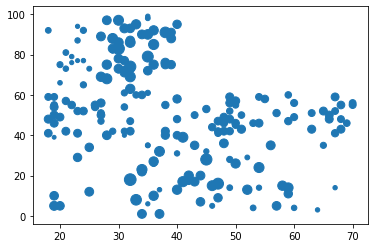

In [110]:
plt.scatter(df.Age, df['Spending Score (1-100)'],df['Annual Income (k$)']);


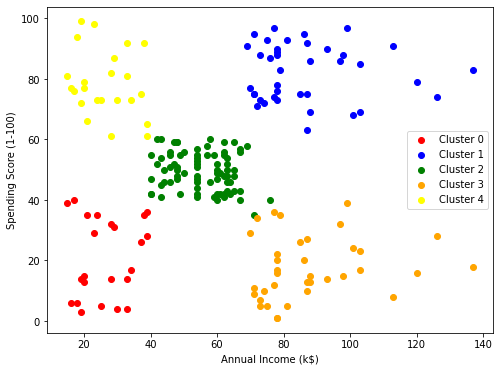

In [111]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)','Age','gender_encoded']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['cluster'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'blue', 'green','orange','yellow']
for i in range(5):
    cluster = df[df['cluster'] == i]
    ax.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'], c=colors[i], label=f'Cluster {i}')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.legend()
plt.show()

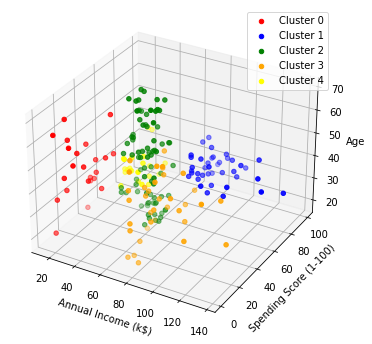

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green','orange','yellow']
for i in range(5):
    cluster = df[df['cluster'] == i]
    ax.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'], cluster['Age'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()
